In [1]:
from pylab import plot, show, legend
from distribution import *
%matplotlib inline
import mpld3
mpld3.enable_notebook()

##### Multiplication of distributions:
    After the measurement, the prior distribution is multiplied with the measurement distribution to obtain the posterior distribution  

 ##### Bayes' rule:
 $$P(X\mid Z) = { {\alpha \:} . P(Z\mid X) . P(X)} $$

In [2]:
def multiply(a, b):
    offset = max(a.start(), b.start())
    final_index = min(a.stop() - 1, b.stop() - 1)
    if offset > final_index: # There is no overlapping between the distributions
        offset = 0
        values = [0]
        d = Distribution(offset, values)
        return d
    else: # There is overlapping between the distributions
        values = [0] * (final_index - offset  + 1)
        for i in xrange(offset, final_index+1):
            values[i - offset] = a.value(i) * b.value(i)
        d = Distribution(offset, values)
        d.normalize()
        return d
    
    values = [0] * (final_index - offset +1)
    return a  


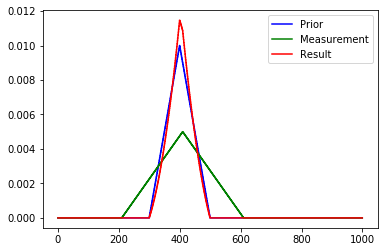

In [3]:
if __name__ == '__main__':
    arena = (0,1000)

    # Here is our assumed position. Plotted in blue.
    position_value = 400
    position_error = 100
    position = Distribution.triangle(position_value, position_error)
    plot(position.plotlists(*arena)[0], position.plotlists(*arena)[1],
         color='b', linestyle='steps', label = 'Prior')

    # Here is our measurement. Plotted in green.
    # That is what we read from the instrument.
    measured_value = 410
    measurement_error = 200
    measurement = Distribution.triangle(measured_value, measurement_error)
    plot(measurement.plotlists(*arena)[0], measurement.plotlists(*arena)[1],
         color='g', linestyle='steps', label = 'Measurement')

    # Now, we integrate our sensor measurement. Result is plotted in red.
    position_after_measurement = multiply(position, measurement)
    plot(position_after_measurement.plotlists(*arena)[0],
         position_after_measurement.plotlists(*arena)[1],
         color='r', linestyle='steps', label = 'Result')
    legend(loc='upper right')
    show()
